# Exercício Prático aplicando PCA

Dataset sobre atributos dos jogadores no jogo eletrônico de esporte FIFA 2022. <br>
Dataset extraído do kaggle: <br>
[FIFA 22 complete player dataset
](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset/data)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Removendo max columns para visualizar as dimensões da tabela
pd.set_option('display.max_columns', None)

In [28]:
df_fifa = pd.read_csv('players_22.csv')
df_fifa

<ipython-input-28-020e77b1dc18>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fifa = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [29]:
df_fifa.head(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [30]:
df_fifa.shape

(19239, 110)

In [31]:
df_fifa.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [32]:
print('Informações sobre o DataFrame df_fifa:')
print(df_fifa.info())

Informações sobre o DataFrame df_fifa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None


Temos muitas variáveis como podemos ver, 110 colunas. Vamos supor que preciso treinar um modelo de clustering com este conjunto de dados, é crucial reduzir a dimensionalidade. <br>
Isso ajuda o modelo a focar nos aspectos mais relevantes, simplificando a interpretação e destacando padrões significativos. <br>

Vamos analisar se realmente podemos aplicar o PCA em nossos dados.

## Matriz de Correlação

A matriz de correlação é como um mapa que nos mostra o quão próximo ou distante diferentes variáveis estão uma das outras em um conjunto de dados. <br>
Vamos gerar uma com nossos dados para entender melhor o funcionamento.

In [33]:
# Criando dataframe somente com as variáveis numéricas
df_fifa_numerico = df_fifa.select_dtypes([np.number])

# Calculando matriz de correlação
correlation_matrix = df_fifa_numerico.corr()
correlation_matrix

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
sofifa_id,1.000000,-0.491523,0.037576,-0.128102,-0.253044,-0.781023,-0.100362,-0.207461,0.110305,-0.036769,0.183841,0.128058,0.065832,-0.009138,0.179041,-0.121359,-0.139709,-0.334292,-0.113962,0.162743,-0.301698,-0.412920,-0.296408,-0.234020,-0.403516,-0.166999,-0.126239,-0.149084,-0.183969,-0.197351,-0.085064,-0.212534,-0.230161,-0.229260,-0.142978,0.103243,0.101162,-0.059928,-0.482973,0.015254,-0.327861,-0.222044,-0.115509,-0.305497,-0.203978,-0.246133,-0.173451,-0.135519,-0.267625,-0.182124,-0.420836,-0.161311,-0.094413,-0.078453,-0.105188,-0.108329,-0.106830,-0.114416,-0.106377,-0.431193
overall,-0.491523,1.000000,0.644275,0.554684,0.601764,0.459451,0.042787,0.150324,-0.226640,-0.179032,-0.186166,0.184987,-0.168315,-0.214303,-0.116020,0.223762,0.376226,0.470647,0.545197,0.174695,0.489623,0.715001,0.666402,0.346760,0.529234,0.401356,0.338746,0.343901,0.516788,0.380942,0.384351,0.420423,0.381030,0.498216,0.460411,0.194044,0.205736,0.270279,0.871823,0.123700,0.561180,0.284689,0.385150,0.364366,0.410010,0.400161,0.316470,0.358562,0.523025,0.343690,0.708867,0.312093,0.259773,0.233589,-0.010990,-0.011080,-0.012986,-0.002485,-0.007960,0.499533
potential,0.037576,0.644275,1.000000,0.527738,0.497611,-0.264142,0.004403,-0.016912,-0.330928,-0.153075,0.009784,0.345188,-0.247198,-0.185054,-0.027984,0.157053,0.283746,0.357283,0.537715,0.258817,0.287862,0.437655,0.490270,0.162151,0.155740,0.243757,0.230814,0.192825,0.367162,0.235766,0.311396,0.270217,0.207769,0.324791,0.347172,0.232621,0.235577,0.223385,0.522483,0.136890,0.332292,0.096992,0.199743,0.073567,0.243294,0.191501,0.157728,0.233070,0.345298,0.208062,0.426790,0.161288,0.156649,0.140869,-0.043093,-0.044989,-0.047030,-0.040184,-0.042383,0.230408
value_eur,-0.128102,0.554684,0.527738,1.000000,0.823527,0.042886,0.010291,0.035188,-0.191468,-0.117917,-0.067670,0.217051,-0.083983,-0.084325,-0.017193,0.149757,0.257232,0.632181,0.995460,0.181934,0.290294,0.404774,0.404812,0.147359,0.215105,0.227414,0.217691,0.165921,0.297419,0.238366,0.240916,0.252820,0.214721,0.278721,0.269854,0.157690,0.164682,0.176597,0.492741,0.117887,0.301723,0.118294,0.198771,0.128684,0.231585,0.183251,0.141060,0.224097,0.324453,0.196231,0.389065,0.140981,0.120724,0.103512,-0.022090,-0.022474,-0.021599,-0.021292,-0.019929,0.204340
wage_eur,-0.253044,0.601764,0.497611,0.823527,1.000000,0.158490,0.028062,0.066208,-0.240514,-0.126592,-0.069797,0.187222,-0.092472,-0.105601,-0.100610,0.160240,0.272319,0.675637,0.821330,0.134479,0.312219,0.438336,0.421867,0.178856,0.249843,0.253123,0.229687,0.207326,0.324420,0.264481,0.255204,0.281428,0.245725,0.310768,0.293376,0.133496,0.142775,0.171261,0.539616,0.105672,0.344529,0.148923,0.199667,0.162081,0.257850,0.225225,0.170430,0.240612,0.347141,0.228939,0.437174,0.169093,0.144442,0.125646,-0.024234,-0.024443,-0.024328,-0.022675,-0.022762,0.280131
age,-0.781023,0.459451,-0.264142,0.042886,0.158490,1.000000,0.083009,0.239444,0.089276,-0.054432,-0.209275,-0.216373,0.060287,-0.006803,-0.192085,0.082149,

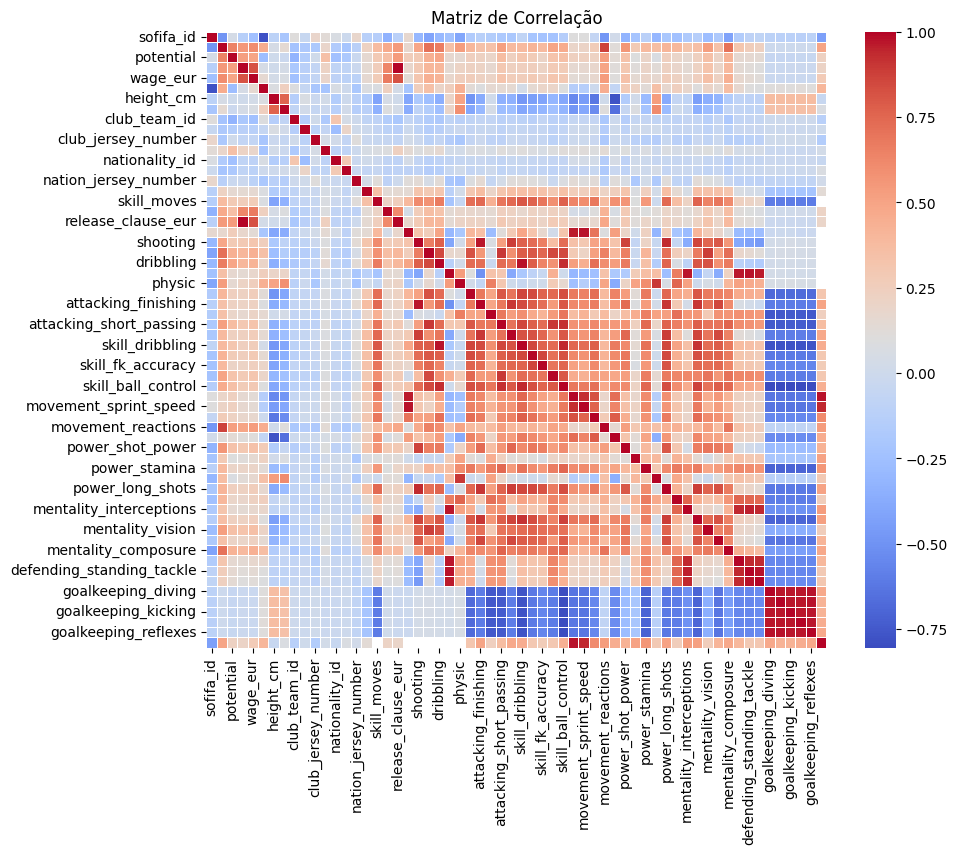

In [34]:
import seaborn as sns

# Visualização da matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Em cada célula dessa tabela, temos um número que varia de -1 a 1, representando o quão forte é a relação entre duas variáveis. Um número próximo de 1 sugere uma forte conexão positiva, enquanto um número próximo de -1 indica uma forte conexão negativa. <br><br>
Ao examinarmos a matriz de correlação, analisamos as interações entre as variáveis de forma mais detalhada. Essa análise é crucial ao considerar a aplicação da Análise de Componentes Principais (PCA), que procura identificar relações lineares entre variáveis. A matriz de correlação atua como uma ferramenta que evidencia essas conexões. Quando as variáveis estão alinhadas de maneira coesa, o PCA desempenha um papel semelhante ao de um guia turístico, simplificando a exploração do conjunto de dados. No entanto, se as variáveis seguem caminhos independentes, outras estratégias de redução de dimensionalidade podem ser mais apropriadas.

In [36]:
df_fifa_numerico.isnull().sum()

sofifa_id                          0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
league_level                      61
club_jersey_number                61
club_contract_valid_until         61
nationality_id                     0
nation_team_id                 18480
nation_jersey_number           18480
weak_foot                          0
skill_moves                        0
international_reputation           0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
a

In [42]:
from sklearn.impute import SimpleImputer

# Preenche os valores com NaN com a média das colunas
imputer = SimpleImputer(strategy='mean')
df_fifa_numerico = pd.DataFrame(imputer.fit_transform(df_fifa_numerico), columns=df_fifa_numerico.columns)

# Checando se existem valores null após tratamento
df_fifa_numerico.isnull().sum()

sofifa_id                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
age                            0
height_cm                      0
weight_kg                      0
club_team_id                   0
league_level                   0
club_jersey_number             0
club_contract_valid_until      0
nationality_id                 0
nation_team_id                 0
nation_jersey_number           0
weak_foot                      0
skill_moves                    0
international_reputation       0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_drib

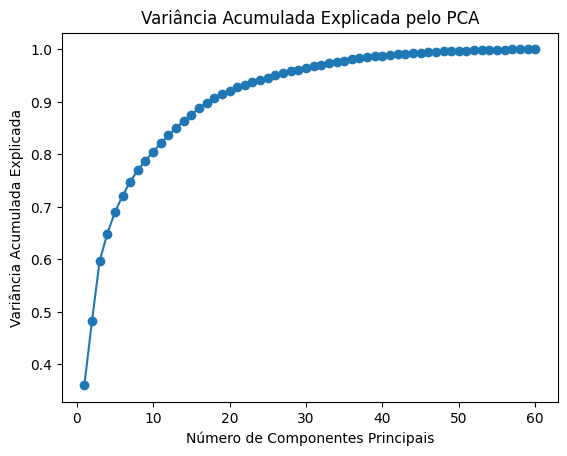

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Padronizando as variáveis
scaler = StandardScaler()
df_fifa_padronizado = scaler.fit_transform(df_fifa_numerico)

# Calculando a variância explicada acumulada
pca = PCA()
pca.fit(df_fifa_padronizado)
variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)

# Visualização da variância explicada acumulada
plt.plot(range(1, len(variancia_cumulativa) + 1), variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()

Analisando o gráfico, vamos definir um limiar 80% de variância.

In [52]:
limiar_de_variancia = 0.80

num_de_pca = np.argmax(variancia_cumulativa >= limiar_de_variancia) + 1

print(f"Número de Componentes para {limiar_de_variancia * 100}% da Variância: {num_de_pca}")

Número de Componentes para 80.0% da Variância: 10


In [54]:
# Por fim vamos então utilizar nosso número de PCA desejado e reduzir nossas 59 columns para 10
pca = PCA(n_components=num_de_pca)

# Aplica o PCA aos dados padronizados
principal_components = pca.fit_transform(df_fifa_padronizado)

In [55]:
# Exibe a proporção de variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.35987355 0.12243569 0.1141741  0.05223797 0.04113113 0.03103841
 0.02685159 0.02241914 0.01769117 0.01716744]


In [58]:
# Pegando o número de componentes principais gerados
num_components = principal_components.shape[1]
# Gerando uma lista para cada PCA
column_names = [f'PC{i}' for i in range(1, num_components + 1)]
# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
pca_df = pd.DataFrame(data=principal_components, columns=column_names)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,14.210223,-5.162155,15.409310,7.898334,6.241700,-1.627969,10.325482,6.942367,-1.303730,0.132196
1,13.364274,-1.849444,17.164790,7.800589,10.648305,-1.105213,11.948515,7.245651,-2.999288,0.406649
2,12.759237,-2.929511,14.784413,1.972837,5.180399,1.449297,7.766636,6.625351,-0.651815,1.538386
3,14.604426,-5.226399,16.436696,12.085066,9.631486,-1.891160,12.605650,7.853699,-3.305107,0.126492
4,14.900056,-1.102371,18.030181,11.888865,9.217602,-3.473779,11.883035,7.523382,-3.080325,1.501411
...,...,...,...,...,...,...,...,...,...,...
19234,-3.418274,-0.205321,-4.833255,-0.006452,-0.897574,-0.786334,3.206705,0.789955,0.365092,-0.077840
19235,-2.478846,-0.706784,-4.226942,0.452799,-0.171948,-1.641765,0.663044,1.807050,0.501018,-0.045523
19236,-3.223077,-0.245011,-4.575284,-0.289144,0.017351,-1.181320,1.700190,1.315712,0.169611,-0.215427
19237,-3.852230,-4.177886,-5.051836,-0.211447,0.986005,0.020409,2.008697,2.058732,0.244908,-0.121930


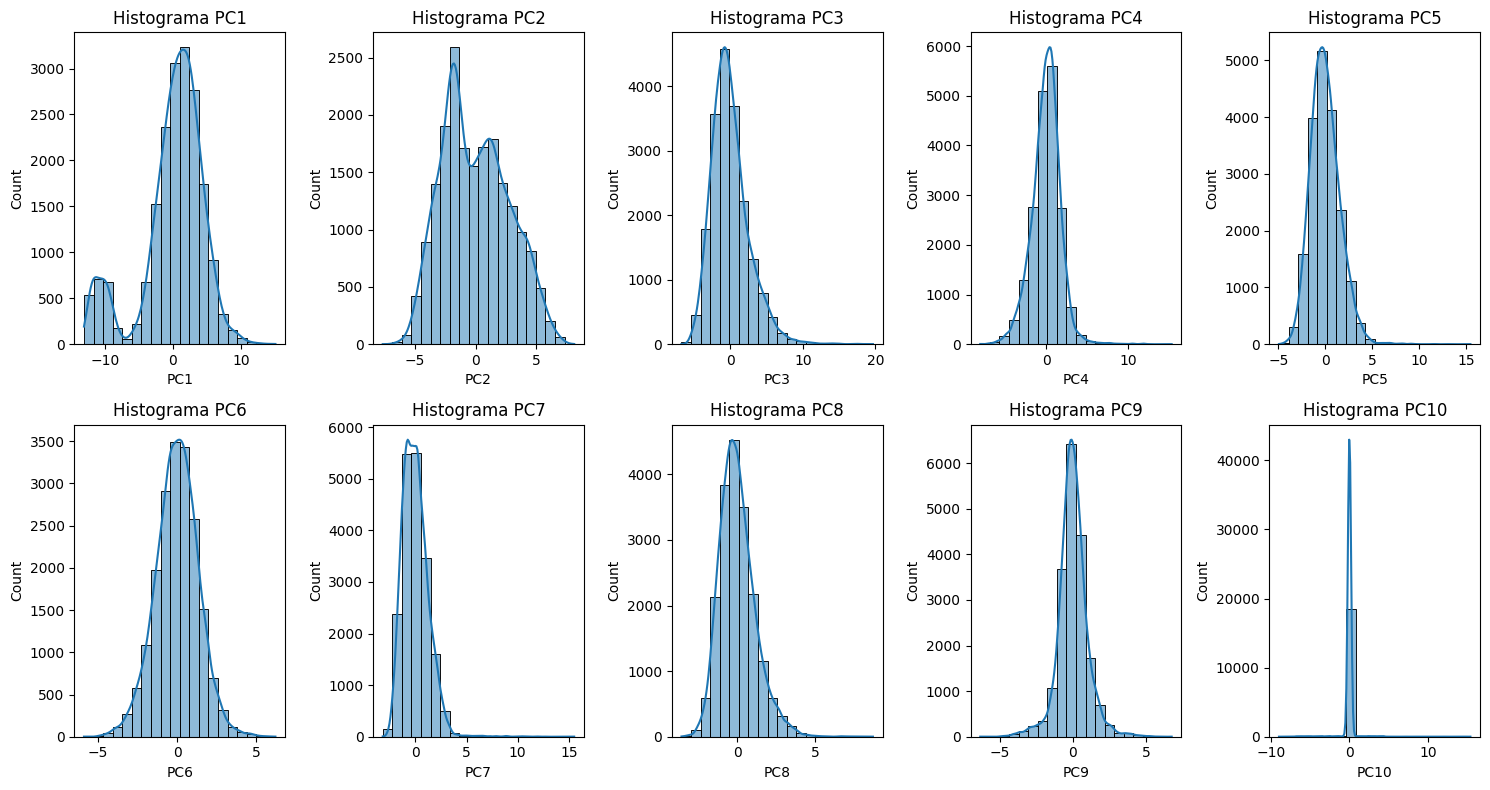

In [59]:
# Criar histogramas para cada coluna
plt.figure(figsize=(15, 8))
for i, col in enumerate(pca_df.columns[:10]):
    plt.subplot(2, 5, i + 1)  # Aqui, ajustei para 2 linhas e 5 colunas
    sns.histplot(pca_df[col], bins=20, kde=True)
    plt.title(f'Histograma {col}')
plt.tight_layout()
plt.show()

Se as distribuições das suas variáveis (PC1 a P10) não seguem uma curva gaussiana (distribuição normal), isso pode impactar a interpretação de algumas análises estatísticas que pressupõem normalidade. Entretanto, nem sempre é necessário que os dados sigam uma distribuição normal, especialmente se você estiver utilizando métodos não paramétricos ou técnicas robustas que não dependem dessa suposição.

In [60]:
from scipy.stats import shapiro
# Vamos olhar para cada coluna a normalidade após a redução de dimensionalidade
for column in pca_df.columns:
    stat, p_value = shapiro(pca_df[column])
    print(f'Variável: {column}, Estatística de teste: {stat}, Valor p: {p_value}')

    # Você pode então interpretar o valor p para determinar se a variável segue uma distribuição normal
    if p_value > 0.05:
        print(f'A variável {column} parece seguir uma distribuição normal.\n')
    else:
        print(f'A variável {column} não parece seguir uma distribuição normal.\n')

Variável: PC1, Estatística de teste: 0.9113912582397461, Valor p: 0.0
A variável PC1 não parece seguir uma distribuição normal.

Variável: PC2, Estatística de teste: 0.9811713099479675, Valor p: 5.465064010866787e-44
A variável PC2 não parece seguir uma distribuição normal.

Variável: PC3, Estatística de teste: 0.9477242231369019, Valor p: 0.0
A variável PC3 não parece seguir uma distribuição normal.

Variável: PC4, Estatística de teste: 0.9726015329360962, Valor p: 0.0
A variável PC4 não parece seguir uma distribuição normal.

Variável: PC5, Estatística de teste: 0.9776826500892639, Valor p: 0.0
A variável PC5 não parece seguir uma distribuição normal.

Variável: PC6, Estatística de teste: 0.9974371194839478, Valor p: 1.656494358469707e-17
A variável PC6 não parece seguir uma distribuição normal.

Variável: PC7, Estatística de teste: 0.9400071501731873, Valor p: 0.0
A variável PC7 não parece seguir uma distribuição normal.

Variável: PC8, Estatística de teste: 0.968809187412262, Valor

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Próximos passos
Muitos algoritmos de clustering, como o K-Means, assumem que os dados seguem uma distribuição esférica e têm variação constante em todas as direções. Se as variáveis que você está usando para clustering não seguem uma distribuição normal, isso pode afetar a performance do algoritmo.

No entanto, vale ressaltar que a sensibilidade dos algoritmos de cluster à normalidade dos dados pode variar. Alguns algoritmos, como o K-Means, podem ser sensíveis à escala e formato dos clusters. Outros algoritmos, como o DBSCAN (Density-Based Spatial Clustering of Applications with Noise), são mais flexíveis em relação à forma e densidade dos clusters.